# Rassemblage données sur les arbres à Paris, Mathis Grillot

In [1]:
import pandas as pd
import seaborn as sns

url = "les-arbres.csv"  ##https://www.data.gouv.fr/fr/datasets/arbres-5/
df = pd.read_csv(url,sep=';')

#### J'ai enfin réussi à récupérer les données car je n'avais pas mis le fichier csv dans le dossier du jupyter. Je compte faire mon travail sur les arbres à Paris d'après un fichier du gouvernement.

In [2]:
df   

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
0,131979,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD D...,000520013,Sequoia,Sequoiadendron,giganteum,NaN,229,0,NaN,NON,"48.83092768617471,2.2678132274487957"
1,200510,Arbre,DJS,PARIS 12E ARRDT,NaN,NaN,CENTRE SPORTIF CARNOT / 26 BOULEVARD CARNOT,000103006,Pin,Pinus,nigra,NaN,80,12,Adulte,NON,"48.84265994838907,2.4117052215873245"
2,256872,Arbre,Alignement,PARIS 19E ARRDT,NaN,NaN,PLACE DE LA BATAILLE DE STALINGRAD,000101018,Peuplier,Populus,nigra,''Italica'',35,8,Jeune (arbre),NON,"48.88376222166032,2.369139467977494"
3,275585,Arbre,Alignement,PARIS 7E ARRDT,C2,NaN,ESPLANADE DES INVALIDES,000301019,Tilleul,Tilia,tomentosa,NaN,125,11,Adulte,NON,"48.86020303977866,2.312202725796723"
4,292397,Arbre,Alignement,PARIS 18E ARRDT,2,NaN,RUE JEAN COCTEAU,000202002,Noisetier de Byzance,Corylus,colurna,NaN,50,7,Jeune (arbre)Adulte,NON,"48.89966347627314,2.3520170246569543"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207644,296485,Arbre,Alignement,PARIS 8E ARRDT,11,NaN,RUE TRONCHET,000101011,Platane,Platanus,x hispanica,NaN,66,11,Adulte,NON,"48.871579281361065,2.3254719334691574"
207645,2028059,Arbre,Jardin,PARIS 14E ARRDT,Ravin / Petite ceinture,NaN,PARC MONTSOURIS / 28 BOULEVARD JOURDAN,052804010,Prunus Fleur n. sp.,Prunus,Fleur n. sp.,NaN,0,0,NaN,NON,"48.82173111905671,2.33995186952521"
207646,2030741,Arbre,Jardin,PARIS 15E ARRDT,Cirque BORMANN,NaN,SQUARE CARLO SARRABEZOLLES / 1 RUE RENE RAVAUD,000203004,NaN,Pyrus,n. sp.,NaN,10,3,Jeune (arbre),NON,"48.837729897904175,2.2705410466136247"
207647,240859,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,BOULEVARD JOURDAN,000903006,Platane,Platanus,x hispanica,NaN,115,11,Jeune (arbre)Adulte,NON,"48.82249609005817,2.328181749257706"


#### On peut analyser la structure ici, nous est renseigné les différents arrondissements d'où proviennent les arbres, leur taille et le type d'arbre. On va s'intéresser ici aux localités et à ces tailles, également à l'âge des arbres qui va nous indiquer dans quel quartier assiste-t-on à un renouveau de la végétation.

## On va maintenant vérifier que nos données sont cohérentes.

In [3]:
df.describe()

,idbase,numero,circonferenceencm,hauteurenm
count,2.076490e+05,0.0,207649.000000,207649.000000
mean,4.931537e+05,NaN,81.137265,8.820861
std,6.631098e+05,NaN,63.007294,6.138698
min,9.987400e+04,NaN,0.000000,0.000000
25%,1.606150e+05,NaN,30.000000,5.000000
50%,2.299070e+05,NaN,70.000000,8.000000
75%,2.850980e+05,NaN,115.000000,12.000000
max,2.041581e+06,NaN,1680.000000,710.000000


#### On fait ici une première vision rapide et on remarque particulièrement la moyenne et les max des tailles. On voit un prolbème sur la hauteur max : 710 mètres parait très invraisemblable. On va donc supprimer la ligne.

In [4]:
h=df.groupby(by='hauteurenm')
h.get_group(710)  ##on cherche d'abord la ligne correspondante (on aurait pu directement supprimer mais cela nous donne l'info)

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
65886,221137,Arbre,Alignement,PARIS 15E ARRDT,78,NaN,AVENUE DE BRETEUIL,000504002,Platane,Platanus,x hispanica,NaN,70,710,Jeune (arbre)Adulte,NON,"48.846749081334885,2.3112479619465374"


In [5]:
df.drop(df.loc[df['hauteurenm']==710].index, inplace=True)  ##on utilise un drop pour cela puis on vérifie

In [6]:
df.describe() 

,idbase,numero,circonferenceencm,hauteurenm
count,2.076480e+05,0.0,207648.000000,207648.000000
mean,4.931550e+05,NaN,81.137319,8.817484
std,6.631112e+05,NaN,63.007441,5.942731
min,9.987400e+04,NaN,0.000000,0.000000
25%,1.606148e+05,NaN,30.000000,5.000000
50%,2.299075e+05,NaN,70.000000,8.000000
75%,2.850982e+05,NaN,115.000000,12.000000
max,2.041581e+06,NaN,1680.000000,119.000000


#### Encore une erreur dans la data car 119 mètres...

In [7]:
df.drop(df.loc[df['hauteurenm']==119].index, inplace=True)
df.describe()  ##même problème obtenu... On va refaire l'opération. (il y aurait plus rapide on pourrait regarder combien il y en a)

,idbase,numero,circonferenceencm,hauteurenm
count,2.076470e+05,0.0,207647.000000,207647.000000
mean,4.931566e+05,NaN,81.136501,8.816954
std,6.631123e+05,NaN,63.006490,5.937824
min,9.987400e+04,NaN,0.000000,0.000000
25%,1.606155e+05,NaN,30.000000,5.000000
50%,2.299080e+05,NaN,70.000000,8.000000
75%,2.850985e+05,NaN,115.000000,12.000000
max,2.041581e+06,NaN,1680.000000,116.000000


In [8]:
df.drop(df.loc[df['hauteurenm']==116].index, inplace=True)
df.describe() 

,idbase,numero,circonferenceencm,hauteurenm
count,2.076460e+05,0.0,207646.000000,207646.000000
mean,4.931583e+05,NaN,81.136140,8.816438
std,6.631135e+05,NaN,63.006428,5.933178
min,9.987400e+04,NaN,0.000000,0.000000
25%,1.606162e+05,NaN,30.000000,5.000000
50%,2.299085e+05,NaN,70.000000,8.000000
75%,2.850988e+05,NaN,115.000000,12.000000
max,2.041581e+06,NaN,1680.000000,78.000000


#### C'est déjà mieux même si cela reste aberrant. On va donc voir à partir de quelle hauteur cela est aberrant.

/Users/grillot/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


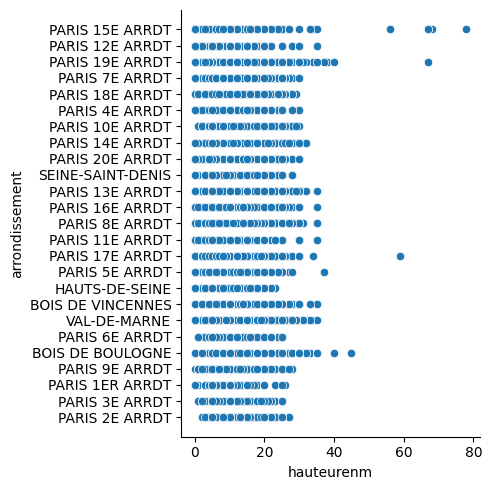

In [9]:
sns.relplot(data=df, x='hauteurenm', y='arrondissement')

### On va donc considérer que les arbres avec une hauteur de plus de 40m correspondent à de fausses informations. 

In [10]:
df.drop(df.loc[df['hauteurenm']>40].index, inplace=True)

### On vérifie nos valeurs.

/Users/grillot/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


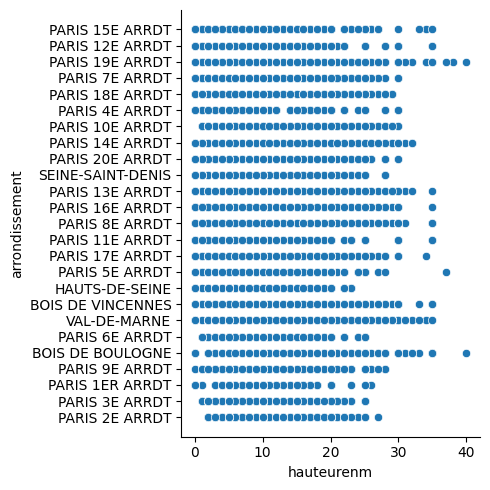

In [11]:
sns.relplot(data=df, x='hauteurenm', y='arrondissement')  

### Tout semble ok sur les hauteurs, faisons de même avec les cironférences et l'on sera fixé.

/Users/grillot/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


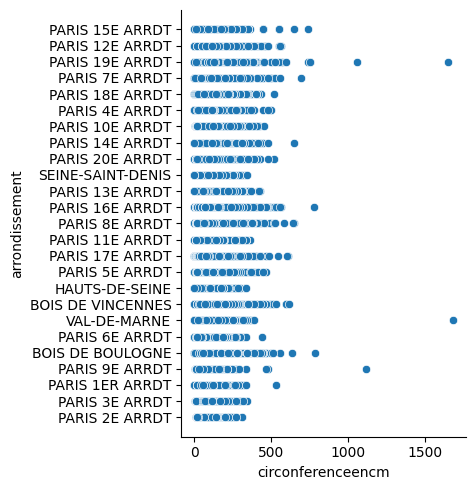

In [12]:
sns.relplot(data=df, x='circonferenceencm', y='arrondissement')  

### On va enlever les données extrêmes donc une circonférence de plus de 10 mètres et on vérifie le résultat.

/Users/grillot/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


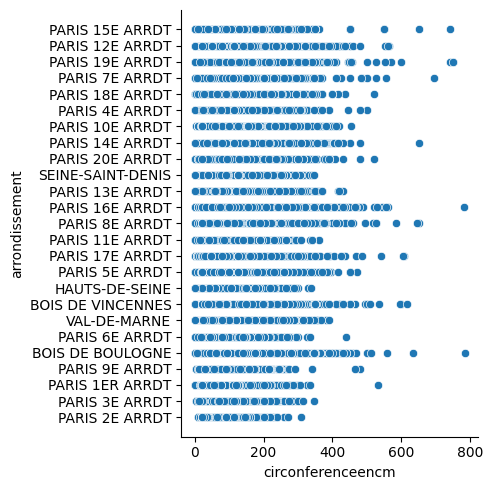

In [13]:
df.drop(df.loc[df['circonferenceencm']>1000].index, inplace=True)
sns.relplot(data=df, x='circonferenceencm', y='arrondissement')  

In [14]:
df.dtypes  ##nous aide dans la manipulation des objets plus tard

idbase                  int64
typeemplacement        object
domanialite            object
arrondissement         object
complementadresse      object
numero                float64
adresse                object
idemplacement          object
libellefrancais        object
genre                  object
espece                 object
varieteoucultivar      object
circonferenceencm       int64
hauteurenm              int64
stadedeveloppement     object
remarquable            object
geo_point_2d           object
dtype: object

# Etude

### On va maintenant rentrer dans le vif du sujet en s'intéressant tout d'abord à la répartition des arbres dans les différentes arrondissements, d'abord en nombre puis en fonction de leurs caractéristiques. Pour se faire on va classer les arbres en taille : petit ou grand.

In [15]:
by_arrondissement = df.groupby(by='arrondissement')
by_age = df.groupby(by='stadedeveloppement')  ##on rassemble en groupe selon arrondissement et âge pour visualiser le nombre. On aurait pu raisonner simplement sur les colonnes. 

In [16]:
sum(by_arrondissement.size()) ##on cherche ici le nombre total d'arbres à Paris 

207634

In [17]:
by_arrondissement.size().sort_values() ##on affiche les données dans l'ordre croissant pour plus de visibilité

arrondissement
PARIS 2E ARRDT         551
PARIS 3E ARRDT        1271
PARIS 9E ARRDT        1374
PARIS 1ER ARRDT       1630
PARIS 6E ARRDT        1787
PARIS 5E ARRDT        2643
PARIS 4E ARRDT        2765
PARIS 10E ARRDT       3609
BOIS DE BOULOGNE      4132
HAUTS-DE-SEINE        5338
PARIS 11E ARRDT       6032
PARIS 8E ARRDT        7476
VAL-DE-MARNE          7578
PARIS 7E ARRDT        8731
PARIS 18E ARRDT      10688
PARIS 14E ARRDT      11593
PARIS 17E ARRDT      11749
BOIS DE VINCENNES    11850
SEINE-SAINT-DENIS    12134
PARIS 12E ARRDT      12840
PARIS 19E ARRDT      14896
PARIS 20E ARRDT      15606
PARIS 13E ARRDT      17018
PARIS 16E ARRDT      17094
PARIS 15E ARRDT      17249
dtype: int64

<Axes: xlabel='arrondissement'>

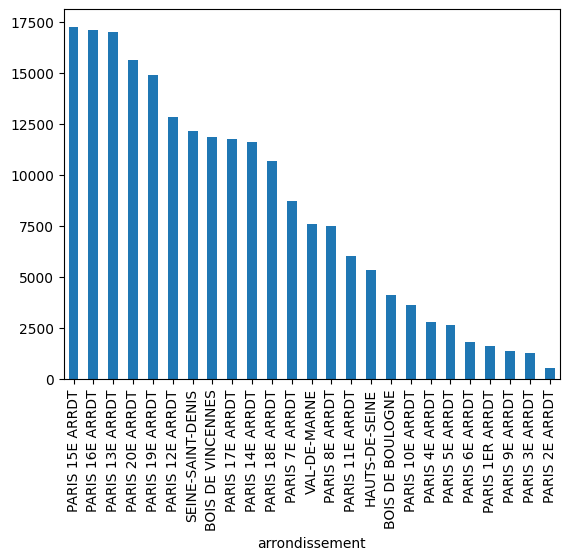

In [18]:
df.arrondissement.value_counts().plot(kind='bar') ##on trace ici les données 

#### On voit que ce sont plutôt les quartiers résidentiels qui abritent le plus grand nombre d'arbres alors que les quartiers plus historiques comme le marais abritent moins d'arbres. Il faut néanmoins prendre en compte la taille des arrondissements. Pour cela on va joindre un autre fichier csv. De plus on aurait pu croire que les bois de Boulogne et de Vincennes abriteraient plus d'arbres.

In [19]:
url2 = "arrondissements-3.csv"
df2 = pd.read_csv(url2, sep=';')  

In [20]:
df2.head()

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,geom_x_y,geom
0,750000003,3.0,75103.0,3√®me Ardt,Temple,750001537.0,1.170883e+06,4519.263648,"48.862872380016924,2.360000985897691","{""coordinates"": [[[2.3638280960629254, 48.8675..."
1,750000009,9.0,75109.0,9√®me Ardt,Op√©ra,750001537.0,2.178303e+06,6471.588290,"48.877163517328796,2.337457543482544","{""coordinates"": [[[2.3397765430833624, 48.8820..."
2,750000005,5.0,75105.0,5√®me Ardt,Panth√©on,750001537.0,2.539375e+06,6239.195396,"48.844443150532726,2.3507146095752596","{""coordinates"": [[[2.364433128355796, 48.84614..."
3,750000019,19.0,75119.0,19√®me Ardt,Buttes-Chaumont,750001537.0,6.792651e+06,11253.182479,"48.8870759965725,2.384820960152513","{""coordinates"": [[[2.3894286961321605, 48.9012..."
4,750000001,1.0,75101.0,1er Ardt,Louvre,750001537.0,1.824613e+06,6054.936862,"48.86256270183607,2.3364433620533878","{""coordinates"": [[[2.328007329038849, 48.86991..."


### On gardera les erreurs d'orthographe car on veut seulement les surfaces.

In [21]:
df2 = df2.set_index("l_ar")
df2.surface.sort_values()

l_ar
2√®me Ardt     9.911537e+05
3√®me Ardt     1.170883e+06
4√®me Ardt     1.600586e+06
1er Ardt       1.824613e+06
6√®me Ardt     2.153096e+06
9√®me Ardt     2.178303e+06
5√®me Ardt     2.539375e+06
10√®me Ardt    2.891739e+06
11√®me Ardt    3.665442e+06
8√®me Ardt     3.880036e+06
7√®me Ardt     4.090057e+06
14√®me Ardt    5.614877e+06
17√®me Ardt    5.668835e+06
20√®me Ardt    5.983446e+06
18√®me Ardt    5.996051e+06
19√®me Ardt    6.792651e+06
13√®me Ardt    7.149311e+06
15√®me Ardt    8.494994e+06
12√®me Ardt    1.631478e+07
16√®me Ardt    1.637254e+07
NaN                     NaN
Name: surface, dtype: float64

#### On voit bien ici qu'il y a un lien direct entre les surfaces les plus grandes et le nombre d'arbres. 
### On va chercher maintenant à voir la répartition au niveau de l'âge des arbres.

In [22]:
by_age.size() 

stadedeveloppement
Adulte                 78509
Jeune (arbre)          36441
Jeune (arbre)Adulte    38512
Mature                  7413
dtype: int64

#### Il y a majoritairement des arbres adultes. Regardons dans chaque quartier.

/Users/grillot/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


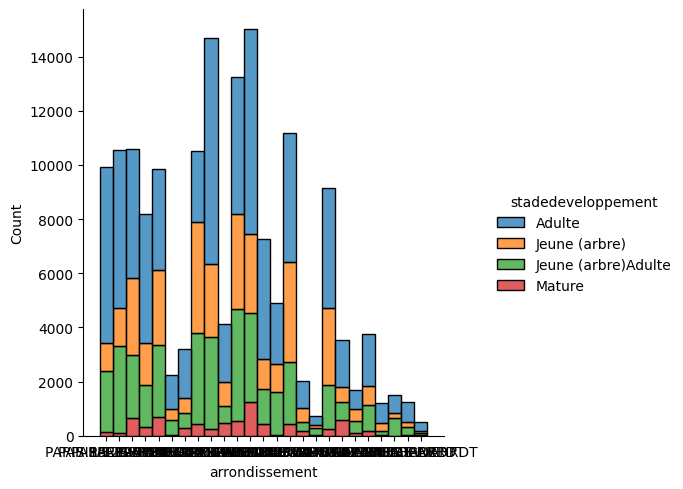

In [23]:
sns.displot(data=df, x='arrondissement',hue ='stadedeveloppement',multiple='stack')

#### On va chercher à déterminer la part d'abres adultres dans chaque quartier. Pour cela on va créer d'autres dataframe pour chaque arrondissement et cela nous sera utile pour la suite. Pour se faire on va mettre en index les arrondissements sur un nouveau df et changer leur nom ensuite.

In [24]:
df.head()

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
0,131979,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD D...,000520013,Sequoia,Sequoiadendron,giganteum,NaN,229,0,NaN,NON,"48.83092768617471,2.2678132274487957"
1,200510,Arbre,DJS,PARIS 12E ARRDT,NaN,NaN,CENTRE SPORTIF CARNOT / 26 BOULEVARD CARNOT,000103006,Pin,Pinus,nigra,NaN,80,12,Adulte,NON,"48.84265994838907,2.4117052215873245"
2,256872,Arbre,Alignement,PARIS 19E ARRDT,NaN,NaN,PLACE DE LA BATAILLE DE STALINGRAD,000101018,Peuplier,Populus,nigra,''Italica'',35,8,Jeune (arbre),NON,"48.88376222166032,2.369139467977494"
3,275585,Arbre,Alignement,PARIS 7E ARRDT,C2,NaN,ESPLANADE DES INVALIDES,000301019,Tilleul,Tilia,tomentosa,NaN,125,11,Adulte,NON,"48.86020303977866,2.312202725796723"
4,292397,Arbre,Alignement,PARIS 18E ARRDT,2,NaN,RUE JEAN COCTEAU,000202002,Noisetier de Byzance,Corylus,colurna,NaN,50,7,Jeune (arbre)Adulte,NON,"48.89966347627314,2.3520170246569543"


In [25]:
L=df.arrondissement.unique() 
L

array(['PARIS 15E ARRDT', 'PARIS 12E ARRDT', 'PARIS 19E ARRDT',
       'PARIS 7E ARRDT', 'PARIS 18E ARRDT', 'PARIS 4E ARRDT',
       'PARIS 10E ARRDT', 'PARIS 14E ARRDT', 'PARIS 20E ARRDT',
       'SEINE-SAINT-DENIS', 'PARIS 13E ARRDT', 'PARIS 16E ARRDT',
       'PARIS 8E ARRDT', 'PARIS 11E ARRDT', 'PARIS 17E ARRDT',
       'PARIS 5E ARRDT', 'HAUTS-DE-SEINE', 'BOIS DE VINCENNES',
       'VAL-DE-MARNE', 'PARIS 6E ARRDT', 'BOIS DE BOULOGNE',
       'PARIS 9E ARRDT', 'PARIS 1ER ARRDT', 'PARIS 3E ARRDT',
       'PARIS 2E ARRDT'], dtype=object)

In [26]:
df_arrondissement=df.set_index('arrondissement')
df_arrondissement.head()

,idbase,typeemplacement,domanialite,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
arrondissement,,,,,,,,,,,,,,,,
PARIS 15E ARRDT,131979,Arbre,Jardin,NaN,NaN,PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD D...,000520013,Sequoia,Sequoiadendron,giganteum,NaN,229,0,NaN,NON,"48.83092768617471,2.2678132274487957"
PARIS 12E ARRDT,200510,Arbre,DJS,NaN,NaN,CENTRE SPORTIF CARNOT / 26 BOULEVARD CARNOT,000103006,Pin,Pinus,nigra,NaN,80,12,Adulte,NON,"48.84265994838907,2.4117052215873245"
PARIS 19E ARRDT,256872,Arbre,Alignement,NaN,NaN,PLACE DE LA BATAILLE DE STALINGRAD,000101018,Peuplier,Populus,nigra,''Italica'',35,8,Jeune (arbre),NON,"48.88376222166032,2.369139467977494"
PARIS 7E ARRDT,275585,Arbre,Alignement,C2,NaN,ESPLANADE DES INVALIDES,000301019,Tilleul,Tilia,tomentosa,NaN,125,11,Adulte,NON,"48.86020303977866,2.312202725796723"
PARIS 18E ARRDT,292397,Arbre,Alignement,2,NaN,RUE JEAN COCTEAU,000202002,Noisetier de Byzance,Corylus,colurna,NaN,50,7,Jeune (arbre)Adulte,NON,"48.89966347627314,2.3520170246569543"


In [27]:
df_arrondissement = df_arrondissement.rename(index={'PARIS 1ER ARRDT': '1','PARIS 2E ARRDT': '2','PARIS 3E ARRDT': '3',
                                                    'PARIS 4E ARRDT': '4','PARIS 5E ARRDT': '5','PARIS 6E ARRDT': '6',
                                                    'PARIS 7E ARRDT': '7','PARIS 8E ARRDT': '8','PARIS 9E ARRDT': '9',
                                                    'PARIS 10E ARRDT': '10','PARIS 11E ARRDT': '11','PARIS 12E ARRDT': '12',
                                                    'PARIS 13E ARRDT': '13','PARIS 14E ARRDT': '14','PARIS 15E ARRDT': '15',
                                                    'PARIS 16E ARRDT': '16','PARIS 17E ARRDT': '17','PARIS 18E ARRDT': '18',
                                                    'PARIS 19E ARRDT': '19','PARIS 20E ARRDT': '20','SEINE-SAINT-DENIS': 'saint_denis',
                                                    'HAUTS-DE-SEINE':'hauts_de_seine','BOIS DE VINCENNES':'vincennes','BOIS DE BOULOGNE':'boulogne','VAL-DE-MARNE':'val_de_marne'})
df_arrondissement

,idbase,typeemplacement,domanialite,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
arrondissement,,,,,,,,,,,,,,,,
15,131979,Arbre,Jardin,NaN,NaN,PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD D...,000520013,Sequoia,Sequoiadendron,giganteum,NaN,229,0,NaN,NON,"48.83092768617471,2.2678132274487957"
12,200510,Arbre,DJS,NaN,NaN,CENTRE SPORTIF CARNOT / 26 BOULEVARD CARNOT,000103006,Pin,Pinus,nigra,NaN,80,12,Adulte,NON,"48.84265994838907,2.4117052215873245"
19,256872,Arbre,Alignement,NaN,NaN,PLACE DE LA BATAILLE DE STALINGRAD,000101018,Peuplier,Populus,nigra,''Italica'',35,8,Jeune (arbre),NON,"48.88376222166032,2.369139467977494"
7,275585,Arbre,Alignement,C2,NaN,ESPLANADE DES INVALIDES,000301019,Tilleul,Tilia,tomentosa,NaN,125,11,Adulte,NON,"48.86020303977866,2.312202725796723"
18,292397,Arbre,Alignement,2,NaN,RUE JEAN COCTEAU,000202002,Noisetier de Byzance,Corylus,colurna,NaN,50,7,Jeune (arbre)Adulte,NON,"48.89966347627314,2.3520170246569543"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,296485,Arbre,Alignement,11,NaN,RUE TRONCHET,000101011,Platane,Platanus,x hispanica,NaN,66,11,Adulte,NON,"48.871579281361065,2.3254719334691574"
14,2028059,Arbre,Jardin,Ravin / Petite ceinture,NaN,PARC MONTSOURIS / 28 BOULEVARD JOURDAN,052804010,Prunus Fleur n. sp.,Prunus,Fleur n. sp.,NaN,0,0,NaN,NON,"48.82173111905671,2.33995186952521"
15,2030741,Arbre,Jardin,Cirque BORMANN,NaN,SQUARE CARLO SARRABEZOLLES / 1 RUE RENE RAVAUD,000203004,NaN,Pyrus,n. sp.,NaN,10,3,Jeune (arbre),NON,"48.837729897904175,2.2705410466136247"


#### Maintenant que les arrondissements ont un plus beau nom on les remet en colonne pour la suite.

In [28]:
df_arrondissement['arrondissement']=df_arrondissement.index
df_arrondissement.head()

,idbase,typeemplacement,domanialite,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d,arrondissement
arrondissement,,,,,,,,,,,,,,,,,
15,131979,Arbre,Jardin,NaN,NaN,PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD D...,000520013,Sequoia,Sequoiadendron,giganteum,NaN,229,0,NaN,NON,"48.83092768617471,2.2678132274487957",15
12,200510,Arbre,DJS,NaN,NaN,CENTRE SPORTIF CARNOT / 26 BOULEVARD CARNOT,000103006,Pin,Pinus,nigra,NaN,80,12,Adulte,NON,"48.84265994838907,2.4117052215873245",12
19,256872,Arbre,Alignement,NaN,NaN,PLACE DE LA BATAILLE DE STALINGRAD,000101018,Peuplier,Populus,nigra,''Italica'',35,8,Jeune (arbre),NON,"48.88376222166032,2.369139467977494",19
7,275585,Arbre,Alignement,C2,NaN,ESPLANADE DES INVALIDES,000301019,Tilleul,Tilia,tomentosa,NaN,125,11,Adulte,NON,"48.86020303977866,2.312202725796723",7
18,292397,Arbre,Alignement,2,NaN,RUE JEAN COCTEAU,000202002,Noisetier de Byzance,Corylus,colurna,NaN,50,7,Jeune (arbre)Adulte,NON,"48.89966347627314,2.3520170246569543",18


In [29]:
M=df_arrondissement.arrondissement.unique() 
M

array(['15', '12', '19', '7', '18', '4', '10', '14', '20', 'saint_denis',
       '13', '16', '8', '11', '17', '5', 'hauts_de_seine', 'vincennes',
       'val_de_marne', '6', 'boulogne', '9', '1', '3', '2'], dtype=object)

In [30]:
df_arrondissement.reset_index(inplace=True,drop=True)
df_arrondissement['arrondissement'] = df_arrondissement['arrondissement'].astype('|S')
df_arrondissement.dtypes

#for x in M :
#    df_x=df[df_arrondissement.arrondissement==str(x)].copy()

idbase                  int64
typeemplacement        object
domanialite            object
complementadresse      object
numero                float64
adresse                object
idemplacement          object
libellefrancais        object
genre                  object
espece                 object
varieteoucultivar      object
circonferenceencm       int64
hauteurenm              int64
stadedeveloppement     object
remarquable            object
geo_point_2d           object
arrondissement           |S14
dtype: object

#### J'ai essayé ici de créer différents dataframe pour chaque quartier mais malheureusement j'avais toujours des erreurs différentes. J'ai donc abandonné l'idée de chercher les proportions de grands arbres dans chaque quartier.

#### On va maintenant chercher à regarder les différentes espèces d'arbres.

In [31]:
by_genre = df.groupby(by='genre')
by_genre.size().sort_values()   ##permet de trier dans l'ordre croissant les valeurs voulues

genre
Abelia               1
Enkianthus           1
Euscaphis            1
Exochorda            1
Garrya               1
                 ...  
Styphnolobium    11588
Acer             19272
Tilia            22127
Aesculus         24857
Platanus         42616
Length: 182, dtype: int64

In [32]:
df.genre.value_counts() ##même opération que précédemment mais cette fois-ci on travaille directement sur la colonne.

genre
Platanus         42616
Aesculus         24857
Tilia            22127
Acer             19272
Styphnolobium    11588
                 ...  
Genista              1
Acca                 1
Stachyurus           1
Argyrocytisus        1
Idesia               1
Name: count, Length: 182, dtype: int64

#### On ne peut malheureusement pas en tirer grand chose.

In [33]:
### on peut peut-être chercher l'espèce majoritaire dans chaque quartier 

#### Intéressons nous maintenant à la taille des arbres et trions les en grandeur. Nous allons voir s'il y a des liens entre taille, circonférence et nombre. 

In [34]:
print(df['circonferenceencm'].max(),df['circonferenceencm'].min())

784 0


In [35]:
df['circonferenceenm']=df.circonferenceencm/100
print(df['circonferenceenm'].max(),df['circonferenceenm'].min())

7.84 0.0


#### J'ai aussi transformé la circonférence en m pour une meilleure vision. On voit que certains arbres qui viennent d'être plantés ont une taille nulle, ce qui est logique. 


In [36]:
print(df['hauteurenm'].max(),df['hauteurenm'].min())

40 0


<Axes: xlabel='hauteurenm'>

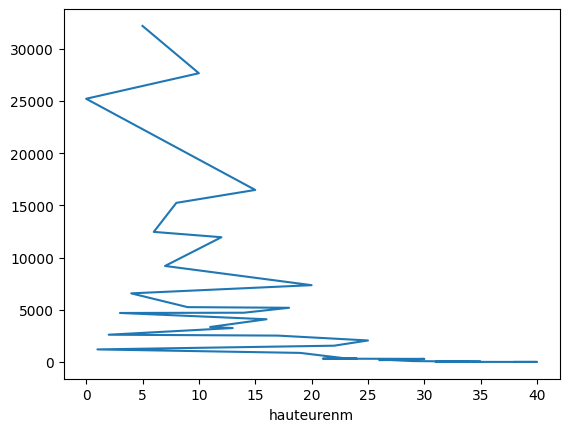

In [37]:
df.hauteurenm.value_counts().plot() 

<Axes: xlabel='hauteurenm'>

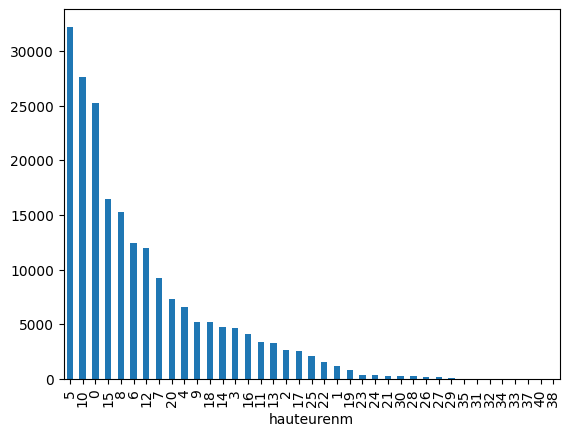

In [38]:
df.hauteurenm.value_counts().plot(kind='bar') 

#### J'ai tracé le graphe en bâtons premièrement mais l'échelle de l'abscisse n'était pas très visible. On se rend mieux compte du phénomène avec le graphe classique : plus la taille est petite plus il y a d'arbres. Idem pour la circonférence ci-dessous ceux qui semblent logique en ville.

<Axes: xlabel='circonferenceenm'>

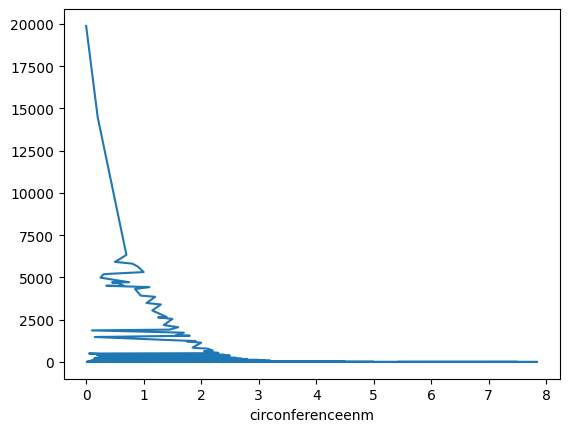

In [39]:
df.circonferenceenm.value_counts().plot() 

<Axes: title={'center': "Circonférence dans l'ordre croissant"}, xlabel='circonferenceencm'>

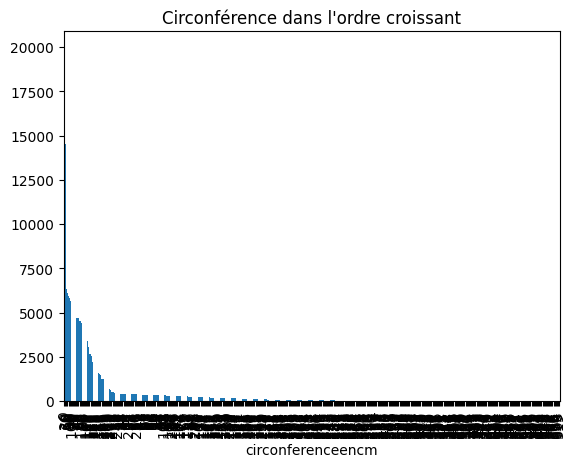

In [40]:
df.circonferenceencm.value_counts().plot(kind='bar',title="Circonférence dans l'ordre croissant")   

#### On voit ici aussi que plus la circonférence est petite plus il y a d'arbres. On va chercher maintenant à voir s'il y a une corrélation entre circonférence et taille ce qui semblerait logique.

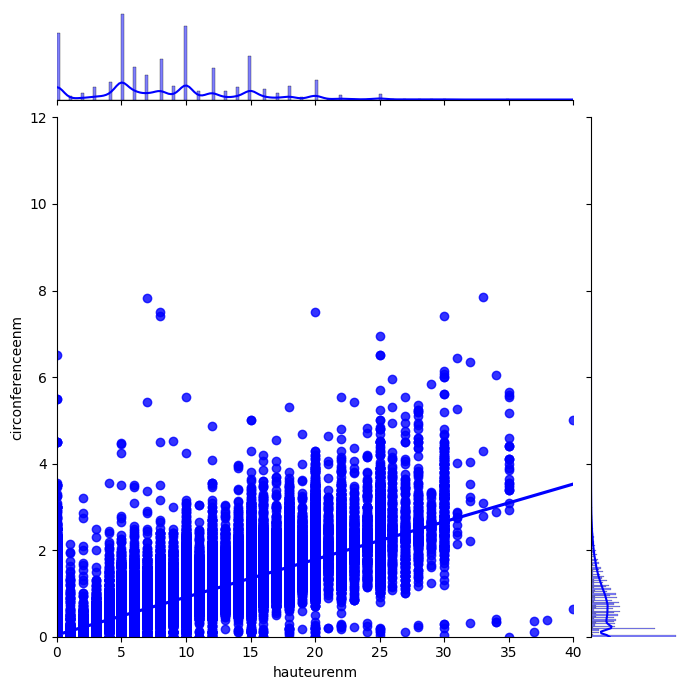

In [41]:
sns.jointplot(x="hauteurenm", y="circonferenceenm", data=df,kind="reg", truncate=False,xlim=(0, 40), ylim=(0, 12),color="b", height=7)

/Users/grillot/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


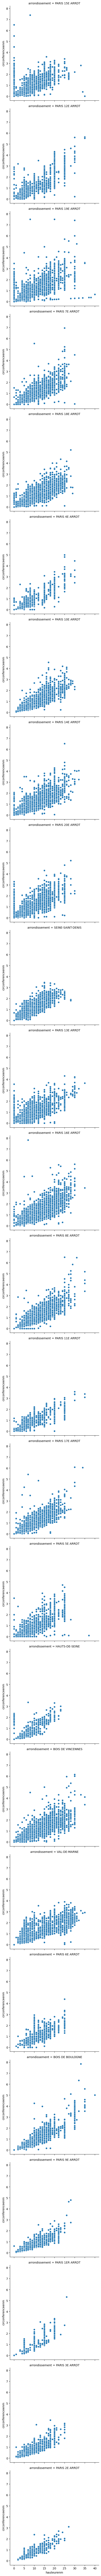

In [42]:
sns.relplot(data=df, x='hauteurenm', y='circonferenceenm',row='arrondissement') 

#### On voit ainsi localement ou globalement une corrélation entre taille et circonférence : plus l'arbre est grand plus sa circonférence est importante (on peut modéliser par une droite passant par l'origine les différents graphes) ce qui termine l'étude des liens possibles. On le voit encore mieux sur le graphique suivant. (Certaines grandes données à la fin faussent le graphe mais si on prend une hauteur inférieur à 30 mètres c'est logique)

/Users/grillot/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


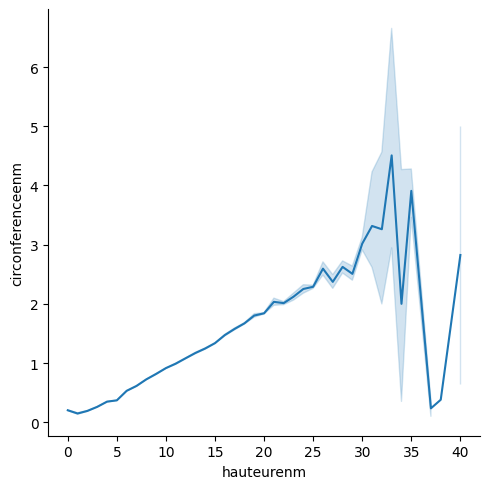

In [43]:
sns.relplot(data=df, x="hauteurenm", y="circonferenceenm", kind="line")

#### On va maintenant chercher à voir quel quartier possède les arbres les plus grands. On va donc séparer nos arbres en deux types : petit ou grand. Pour choisir le paramètre de distinction regardons les différentes distributions.

/Users/grillot/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


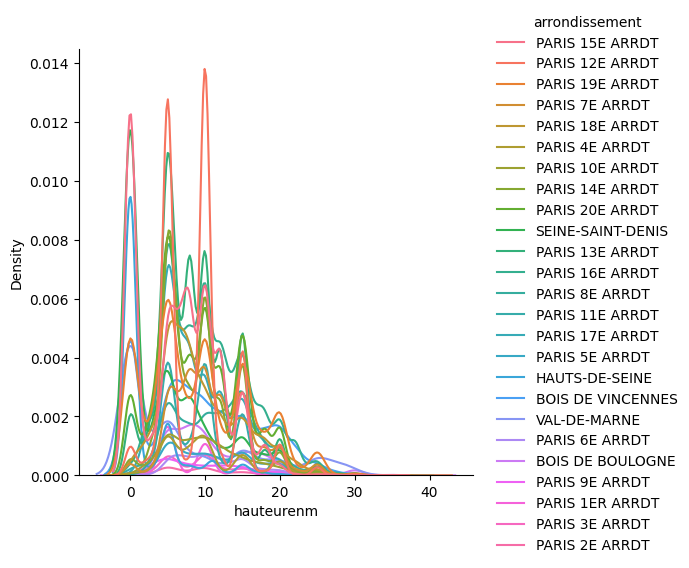

In [44]:
sns.displot(data=df, x='hauteurenm', hue='arrondissement', kind='kde')

#### On voit ici que dans la majorité des quartiers on a une tendance à être autour de 10 mètres en moyenne ; nous prendrons donc cette valeur.

In [45]:
df['taille']=pd.cut(df['hauteurenm'],bins=[ -1,10, 100],labels=['petit', ' grand'])  

In [46]:
df.head()

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d,circonferenceenm,taille
0,131979,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD D...,000520013,Sequoia,Sequoiadendron,giganteum,NaN,229,0,NaN,NON,"48.83092768617471,2.2678132274487957",2.29,petit
1,200510,Arbre,DJS,PARIS 12E ARRDT,NaN,NaN,CENTRE SPORTIF CARNOT / 26 BOULEVARD CARNOT,000103006,Pin,Pinus,nigra,NaN,80,12,Adulte,NON,"48.84265994838907,2.4117052215873245",0.80,grand
2,256872,Arbre,Alignement,PARIS 19E ARRDT,NaN,NaN,PLACE DE LA BATAILLE DE STALINGRAD,000101018,Peuplier,Populus,nigra,''Italica'',35,8,Jeune (arbre),NON,"48.88376222166032,2.369139467977494",0.35,petit
3,275585,Arbre,Alignement,PARIS 7E ARRDT,C2,NaN,ESPLANADE DES INVALIDES,000301019,Tilleul,Tilia,tomentosa,NaN,125,11,Adulte,NON,"48.86020303977866,2.312202725796723",1.25,grand
4,292397,Arbre,Alignement,PARIS 18E ARRDT,2,NaN,RUE JEAN COCTEAU,000202002,Noisetier de Byzance,Corylus,colurna,NaN,50,7,Jeune (arbre)Adulte,NON,"48.89966347627314,2.3520170246569543",0.50,petit


In [47]:
by_taille=df.groupby(by='taille')

In [48]:
by_taille.size()

taille
petit     142273
 grand     65361
dtype: int64

/Users/grillot/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


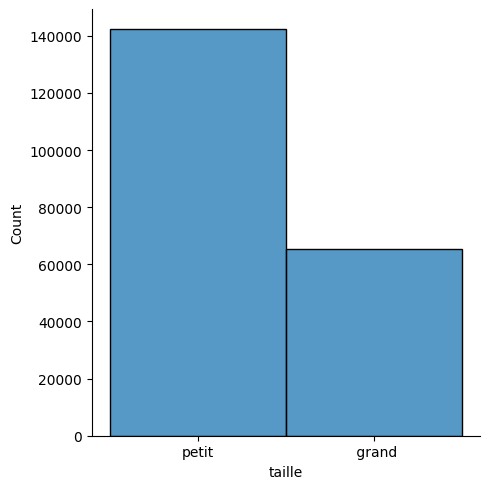

In [49]:
sns.displot(data=df, x='taille')

#### On voit qu'avec la caractéristique de 10 mètres on obtient bien plus de "petits" arbres mais cela est voulu.

/Users/grillot/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


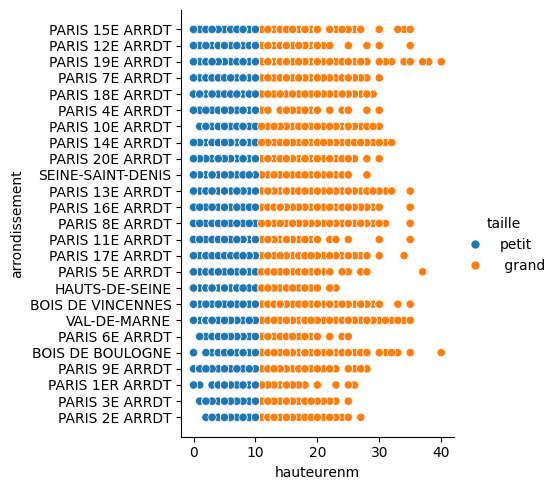

In [50]:
sns.relplot(data=df, x='hauteurenm', y='arrondissement',hue='taille')

/Users/grillot/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


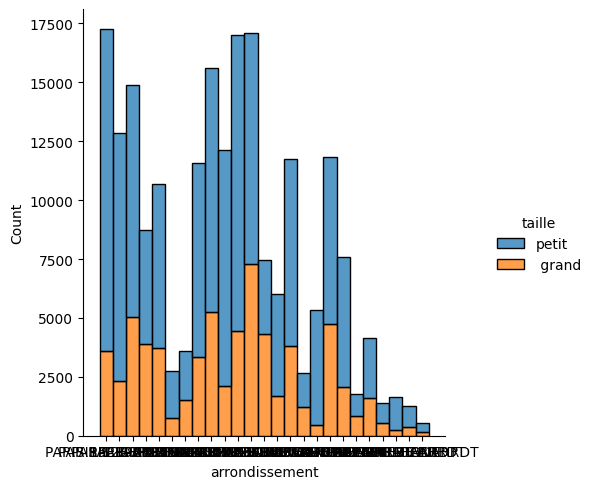

In [51]:
sns.displot(data=df, x='arrondissement',hue ='taille',multiple='stack')

#### On peut voir ici la répartition même si l'échelle n'est pas très visible.

In [52]:
df_grand = df[df.taille=="grand"].copy()
df_grand.head()   ##ça n'a pas marché alors que ça avait marché pour le covid...

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d,circonferenceenm,taille


In [53]:
#df_grand.arrondissement.value_counts().plot(kind='bar')

#### On va maintenant regarder la part des arbres jeunes dans chaque quartier.

In [54]:
by_arrondissement_developpement = df.groupby(['arrondissement', 'stadedeveloppement'])  

In [55]:
by_arrondissement_developpement.size()

arrondissement     stadedeveloppement 
BOIS DE BOULOGNE   Adulte                 1916
                   Jeune (arbre)           710
                   Jeune (arbre)Adulte     937
                   Mature                  182
BOIS DE VINCENNES  Adulte                 4440
                                          ... 
SEINE-SAINT-DENIS  Mature                  465
VAL-DE-MARNE       Adulte                 1742
                   Jeune (arbre)           543
                   Jeune (arbre)Adulte     694
                   Mature                  564
Length: 100, dtype: int64

In [56]:
for (arrondissement, developpement), subdf in by_arrondissement_developpement:
    print(f"there were {len(subdf)} {developpement} in class {arrondissement} ")

there were 1916 Adulte in class BOIS DE BOULOGNE 
there were 710 Jeune (arbre) in class BOIS DE BOULOGNE 
there were 937 Jeune (arbre)Adulte in class BOIS DE BOULOGNE 
there were 182 Mature in class BOIS DE BOULOGNE 
there were 4440 Adulte in class BOIS DE VINCENNES 
there were 2822 Jeune (arbre) in class BOIS DE VINCENNES 
there were 1642 Jeune (arbre)Adulte in class BOIS DE VINCENNES 
there were 238 Mature in class BOIS DE VINCENNES 
there were 342 Adulte in class HAUTS-DE-SEINE 
there were 108 Jeune (arbre) in class HAUTS-DE-SEINE 
there were 236 Jeune (arbre)Adulte in class HAUTS-DE-SEINE 
there were 41 Mature in class HAUTS-DE-SEINE 
there were 1822 Adulte in class PARIS 10E ARRDT 
there were 519 Jeune (arbre) in class PARIS 10E ARRDT 
there were 569 Jeune (arbre)Adulte in class PARIS 10E ARRDT 
there were 287 Mature in class PARIS 10E ARRDT 
there were 2246 Adulte in class PARIS 11E ARRDT 
there were 1054 Jeune (arbre) in class PARIS 11E ARRDT 
there were 1584 Jeune (arbre)Adulte

### Pour conclure, on a pu voir qu'une majorité des arbres présents étaient adultes, que la majorité des arbres se trouvaient dans les quartiers résidentiels. De plus, on a pu explorer la taille de ces arbres. En effet on observe bien un lien logique entre taille et circonférence. Plus l'arbre est petit ou a une faible circonférence plus il est fréquent et plus il est grand plus il a une circonférence importante.

## FIN